# Data-X Spring 2019: Homework 9

## Student name: Keshav Kothari






## Student id: 3034344473

**Q1.** You have now seen how Neural networks work. You have also seen how to create and visualize neural networks using Tensorflow and Tensorboard. In this Question, you will be working on Neural networks. You will be using MNIST data (labelled images of digits) that we discussed in the class to create vanilla dense Neural network model using **tensorflow** (You can use 1.x and 2.x as well, **You can use Tensorflow with Keras**) with the following characteristics:
- Input layer size of 784 (Since each image is 28 * 28)
- Three hidden layers of 300, 200 , 100
- Output layer of 10 (Since 0 - 9 digits)
- Use stochastic gradient descent
- Any other requirements can be your choice


Note that you have to define own functions for calculating loss function, optimizer to feed into the neural network. 




**Plot your neural network graph (using tensorboard) and the plot of performance results (Training and Validation accuracies and loss) for every epoch**

Note: You can access MNIST data from **keras.datasets** [Link](https://keras.io/datasets/#mnist-database-of-handwritten-digits) or any standard available MNIST datasource (http://yann.lecun.com/exdb/mnist/) 

In [1]:
# Your code here
import tensorflow as tf
from tensorflow.keras import losses
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
from time import time

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300, activation=tf.nn.relu),
  tf.keras.layers.Dense(200, activation=tf.nn.relu),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
loss = losses.sparse_categorical_crossentropy
model1.compile(loss=loss,
              optimizer=sgd,
              metrics=['accuracy'])
tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
history = model1.fit(x_train, y_train, validation_split=0.2, epochs=5, callbacks=[tbCallBack])
model1.evaluate(x_test, y_test)

Instructions for updating:
Colocations handled automatically by placer.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 11s 235us/sample - loss: 0.2817 - acc: 0.9143 - val_loss: 0.1311 - val_acc: 0.9632
Epoch 2/5
48000/48000 [==============================] - 11s 227us/sample - loss: 0.1076 - acc: 0.9680 - val_loss: 0.1105 - val_acc: 0.9671
Epoch 3/5
48000/48000 [==============================] - 11s 230us/sample - loss: 0.0743 - acc: 0.9768 - val_loss: 0.0905 - val_acc: 0.9743
Epoch 4/5
48000/48000 [==============================] - 11s 233us/sample - loss: 0.0518 - acc: 0.9836 - val_loss: 0.0911 - val_acc: 0.9744
Epoch 5/5
10000/10000 [==============================] - 1s 79us/sample - loss: 0.0706 - acc: 0.9772


[0.07064836732036202, 0.9772]

Network Graph
![alt text](graph_run=.png "Network Graph")
Training Loss
<img src="epoch_loss_1.svg" alt="Drawing" style="width: 500px;"/>
Training Accuracy
<img src="epoch_acc_1.svg" alt="Drawing" style="width: 500px;"/>
Validation Loss
<img src="epoch_val_loss_1.svg" alt="Drawing" style="width: 500px;"/>
Validation Accuracy
<img src="epoch_val_acc_1.svg" alt="Drawing" style="width: 500px;"/>


**Q2.** Use transfer learning and use the Imagenet VGG16 model to train on MNIST data. You can use **Keras** for solving this question. You can choose any requirements on loss function, optimizer etc. **Plot the performance results (Training and Validation accuracies & loss) for every epoch**

In [35]:
import sys
import numpy as np
import cv2
import sklearn.metrics as sklm

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model, load_model
from keras.datasets import mnist
from keras import backend as K

img_dim_ordering = 'tf'
K.set_image_dim_ordering(img_dim_ordering)

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# the model
def pretrained_model(img_shape, num_classes):
    model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
    # Make vgg16 model layers as non trainable
    for layer in model_vgg16_conv.layers:
        layer.trainable = False

    #Create your own input format
    keras_input = Input(shape=img_shape, name = 'image_input')
    
    #Use the generated model 
    output_vgg16_conv = model_vgg16_conv(keras_input)
    
    #Add the fully-connected layers 
    x = Flatten(name='flatten')(output_vgg16_conv)
    x = Dense(256, activation='relu', name='fc1')(x)
    x = Dense(64, activation='relu', name='fc2')(x)
    x = Dense(num_classes, activation='softmax', name='predictions')(x)
    
    #Create your own model 
    pretrained_model = Model(inputs=keras_input, outputs=x)
    return pretrained_model

# converting it to RGB
x_train = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_train]
x_train = np.concatenate([arr[np.newaxis] for arr in x_train]).astype('float32')

x_test = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_test]
x_test = np.concatenate([arr[np.newaxis] for arr in x_test]).astype('float32')

# training the model
model2= pretrained_model(x_train.shape[1:], len(set(y_train)))

In [36]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model2.fit(x_train, y_train, nb_epoch=2, validation_split=0.2, shuffle=True)

/home/keshav/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 147s 3ms/step - loss: 0.4511 - acc: 0.8901 - val_loss: 0.2128 - val_acc: 0.9312
Epoch 2/2
48000/48000 [==============================] - 144s 3ms/step - loss: 0.1893 - acc: 0.9390 - val_loss: 0.2103 - val_acc: 0.9313


In [37]:
model2.evaluate(x_test, y_test)

10000/10000 [==============================] - 23s 2ms/step


[0.20951285454928875, 0.9317]

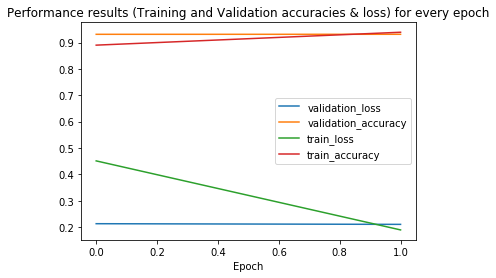

In [43]:
import matplotlib.pyplot as plt
num_epoch = range(0,2)
plt.plot(num_epoch,history.history['val_loss'],label='validation_loss')
plt.plot(num_epoch,history.history['val_acc'],label='validation_accuracy')
plt.plot(num_epoch,history.history['loss'],label='train_loss')
plt.plot(num_epoch,history.history['acc'],label='train_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.title('Performance results (Training and Validation accuracies & loss) for every epoch')
plt.show()

**EXTRA CREDIT Q.** **(MANDATORY for students taking IND ENG 290)** Customize your neural networks in **Q1** to how many ever layers you want, use [batch normalization](https://www.tensorflow.org/api_docs/python/tf/layers/batch_normalization) and [Adam Optimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer) and try different regularization techniques to combat overfitting. Also use as many iterations you want and plot every 10th iteration on the tensorboard. We will give extra credit if you achieve more than **98.5%** on the MNIST data. **Plot the neural network graph (using tensorboard) and describe the settings that you used and the performance results. Also plot performance results (Training and Validation accuracies & loss) for every epoch**

Note: You can use Keras if necessary for solving this question. In case you are using Keras and are unable to plot the neural network graph, plot only the performance results.

If you cannot run your tensorflow notebooks locally, you can use. 
https://datahub.berkeley.edu/hub/home

In [48]:
# Your code here
import tensorflow as tf
from tensorflow.keras import losses
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Adadelta
from tensorflow.keras.callbacks import TensorBoard
from time import time

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
opt = Adam()
loss = losses.categorical_crossentropy
model3.compile(loss=loss,
              optimizer=opt,
              metrics=['accuracy'])
tbCallBack = TensorBoard(log_dir='./Graph_3', histogram_freq=0, write_graph=True, write_images=True)
history = model3.fit(x_train, y_train, validation_split=0.1, epochs=20, callbacks=[tbCallBack], shuffle=True)
model3.evaluate(x_test, y_test)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 28s 514us/sample - loss: 0.2534 - acc: 0.9228 - val_loss: 0.1044 - val_acc: 0.9695
Epoch 2/20
54000/54000 [==============================] - 25s 472us/sample - loss: 0.1435 - acc: 0.9561 - val_loss: 0.0825 - val_acc: 0.9767
Epoch 3/20
54000/54000 [==============================] - 26s 476us/sample - loss: 0.1136 - acc: 0.9642 - val_loss: 0.0772 - val_acc: 0.9783
Epoch 4/20
54000/54000 [==============================] - 25s 468us/sample - loss: 0.1014 - acc: 0.9676 - val_loss: 0.0679 - val_acc: 0.9802
Epoch 5/20
54000/54000 [==============================] - 25s 467us/sample - loss: 0.0828 - acc: 0.9730 - val_loss: 0.0726 - val_acc: 0.9817
Epoch 6/20
54000/54000 [==============================] - 25s 467us/sample - loss: 0.0759 - acc: 0.9753 - val_loss: 0.0685 - val_acc: 0.9815
Epoch 7/20
54000/54000 [==============================] - 25s 470us/sample - loss: 0.0666 - acc: 0.9792 -

[0.05769822396981836, 0.985]

In [18]:
# Save Model
tf.keras.models.save_model(model3,'./98_5_dense')

Network Graph
![alt text](graph_3.png "Network Graph")

Training Loss
<img src="epoch_loss.svg" alt="Drawing" style="width: 500px;"/>
Training Accuracy
<img src="epoch_acc.svg" alt="Drawing" style="width: 500px;"/>
Validation Loss
<img src="epoch_val_loss.svg" alt="Drawing" style="width: 500px;"/>
Validation Accuracy
<img src="epoch_val_acc.svg" alt="Drawing" style="width: 500px;"/>

# Model Description

I tried increasing the layer size and layer depth but they saturated at around 98% accuracy. I googled for what people used and most of them indicated using CNNs to get accuracy above 98% which we we're allowed to. The question indicated that overfitting might be the issue because of which I limited my layer size to 2, with dimensions of 512 and 256 which seemed to work best for the users. I further added batch normalization and dropouts (20%) to combat overfitting. The Adam optimizer was used as asked for in the question. I tried various loss functions and eventually categorical_crossentropy got me over the hurdle. I also had to adjust the validation percentage to 0.1 to have more training data to train on with 20 epoch. I tried using a lower batch size but that took too long to train. 

In [4]:
# Test the model again

import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

model4 = tf.keras.models.load_model('./98_5_dense')
model4.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 132us/sample - loss: 0.0577 - acc: 0.9850


[0.05769822396981836, 0.985]